/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


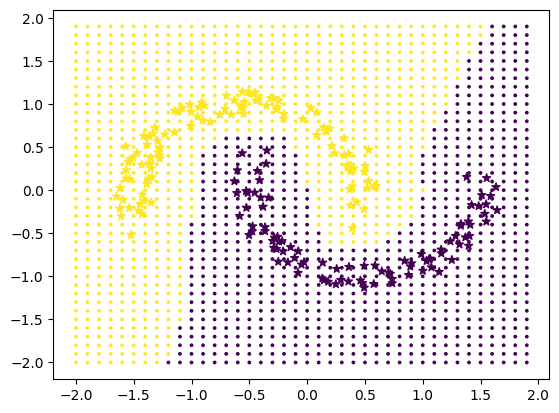

In [3]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier as knn
import matplotlib.pyplot as plt

data = pd.read_csv("D2z.txt", sep=" ", header=None, names=["x1", "x2", "y"])

X_train = data.iloc[:, 0:2]
y_train = data.y
knn1 = knn(n_neighbors=1)
knn1.fit(X_train, y_train)

test_points =[(x1, x2) for x1 in np.arange(-2, 2, .1) for x2 in np.arange(-2, 2, .1)]
test_predictions = knn1.predict(test_points)

x1_test = [i[0] for i in test_points]
x2_test = [i[1] for i in test_points]
plt.scatter(x1_test, x2_test, c=test_predictions, s=3)
plt.scatter(X_train.x1, X_train.x2, c=y_train, marker="*")
plt.savefig("d2z_plot.png")

if __name__ == '__main__':
    pass

0.8
0.45
0.2


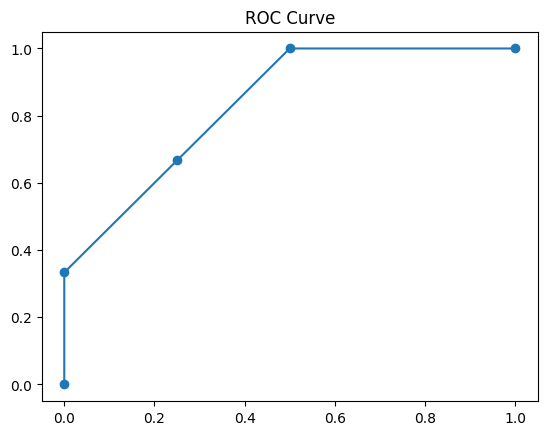

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("Q5.txt", sep=" ", header=None, names=["y", "c"])

n_pos = sum(data.y)
n_neg = len(data.y) - n_pos

tp, fp, last_tp = (0, 0, 0)
roc_x = [0]
roc_y = [0]
for i in range(len(data.y)):
    if (i > 0):
        if (data.c[i] != data.c[i-1]) & (data.y[i] == 0) & (tp > last_tp):
            roc_x.append(fp / n_neg)
            roc_y.append(tp / n_pos)
            last_tp = tp
            print(data.c[i])
    if data.y[i] == 1:
        tp += 1
    else:
        fp += 1

roc_x.append(1)
roc_y.append(1)
plt.plot(roc_x, roc_y)
plt.scatter(roc_x, roc_y)
plt.title("ROC Curve")
plt.savefig("q5_roc_curve.png")

if __name__ == '__main__':
    pass